**Write a function that calculates the summation of a series based on a formula.**

 **sigma(start_n, end_n, term_func)**

Math:

**Helper Functions:**

 **f(n) = n (Sum of integers)**

 **f(n) = n^2 (Sum of squares)**
 
 **f(n) = 1/n (Harmonic series)**


 **f(n) = n (Sum of integers)**

In [1]:
def summ_integers(n):
    return n

 **f(n) = n^2 (Sum of squares)**

In [2]:
def square_integers(a):
    return a * a

 **f(n) = 1/n (Harmonic series)**

In [3]:
def harmonic(c):
    return 1/c

**MAIN FUNCTION**

In [9]:
def sigma(start_n, end_n, term_func):
    result = 0
    for i in range(start_n, end_n + 1): # Inclusive of the last term 
        result = result + term_func(i) 
    return result

**Call backs**

In [6]:
sigma(3, 5, summ_integers)

12

In [7]:
sigma(3, 5, square_integers)

50

In [31]:
sigma(1, 100, harmonic)

5.187377517639621

**Asserts**

**Sum of First n natural numbers**

**n(n + 1) / 2**

In [19]:
def sumofn(first_t, last_t):
    nums = last_t - first_t + 1
    summ = nums * (nums + 1) // 2
    return summ


In [20]:
sumofn(1,100)

5050

In [23]:
assert(sigma(1,100, summ_integers)==sumofn(1,100))

**Sum of squares**

**b(b+1)(2b+1) // 6 - (a-1)a(2a-1) // 6**

In [26]:
def sumofsquares(a, b): # a = start term & b = last term
    result = b * (b+1) * (2*b + 1) // 6 - (a - 1) * a * (2*a - 1) //6
    return result


In [28]:
sumofsquares(1,100)

338350

In [30]:
assert(sigma(1,100, square_integers)==sumofsquares(1,100))

**Write a function compute_average_loss(predictions, targets, loss_func) that measures how "wrong" a set of predictions is, based on a customizable rule.**

**Inputs:**

**predictions: A list of numbers (e.g., [10, 12, 18]).**
**targets: A list of correct answers (e.g., [10.1, 12.3, 19]).**
**loss_func: A function that takes two numbers (pred, target) and returns a single number representing the error.**
**The Math (to be implemented as helper functions):**

**Mean Squared Error (MSE): The standard for regression.**
**Mean Absolute Error (MAE): Robust to outliers.**

**MSE**

In [10]:
def MSE(pred, targ):
    loss = (pred - targ)**2 # loss calculation in MSE
    return loss

MAE

In [11]:
def MAE(preds, targets):
    error = abs(preds - targets) # loss calculation in MAE
    return abs(error)

**MAIN FUNCTION**

In [12]:
def compute_average_loss(predictions, targets, loss_func):
    summ = 0
    for pred, target in zip(predictions, targets): #zip() pairs elements from both lists index-by-index and stops at the shorter list
        summ = summ + loss_func(pred, target) # Passing a function as an argument and summing its returned output
    result = summ / min(len(predictions),len(targets)) # Compute average using the length of the shorter list
    return result



In [13]:
import random
noise_level = 2
preds = [random.randint(1,10) for i in range(50000)] #Obtaining list from 1-10 numbers randomly
targets = [j + random.uniform(-noise_level, noise_level) for j in preds]
#print(preds)
#print(targets)
print(round(compute_average_loss(preds, targets, MSE),1))
print(round(compute_average_loss(preds, targets, MAE),1))

1.3
1.0


In [19]:
sizes = [5, 50, 500, 5000, 50000] # list to check behaviour of MSE & MAE for different sizes 
mse_values = [] 
mae_values = []

for size in sizes:
    predictions = [random.randint(1,10) for i in range(size)]
    Targets = [pred + random.uniform(-noise_level, noise_level) for pred in predictions]
    mse_values.append(round(compute_average_loss(predictions, Targets, MSE),1)) # Store MSE values for different sizes
    mae_values.append(round(compute_average_loss(predictions, Targets, MAE),1)) # Store MAE values for different sizes
print(mse_values)
print(mae_values)


[1.9, 1.4, 1.3, 1.3, 1.3]
[1.2, 1.0, 1.0, 1.0, 1.0]


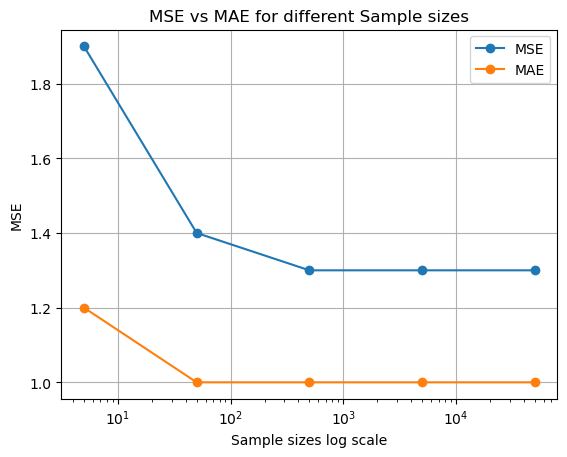

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sizes, mse_values, marker='o', label = "MSE")
plt.plot(sizes, mae_values, marker='o', label = "MAE")
plt.xscale('log')
plt.xlabel("Sample sizes log scale")
plt.ylabel("MSE")
plt.title("MSE vs MAE for different Sample sizes")
plt.grid(True)
plt.legend()
plt.show()